In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import pandas as pd


In [2]:
base_dir = "FER2013"
train_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\train")
test_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\test")
print("train folder path", train_dir)
print("test folder path", test_dir)

train folder path C:\Users\avija\Downloads\FER2013\train
test folder path C:\Users\avija\Downloads\FER2013\test


In [3]:
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print("classes are found:", classes)

classes are found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
for c in classes:
    img_count = len(os.listdir(os.path.join(train_dir, c)))
    print(f"{c}: {img_count} images")

angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


In [5]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="training"
)

Found 22968 images belonging to 7 classes.


In [8]:
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="validation"
)
    

Found 5741 images belonging to 7 classes.


In [9]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=False
)

Found 7178 images belonging to 7 classes.


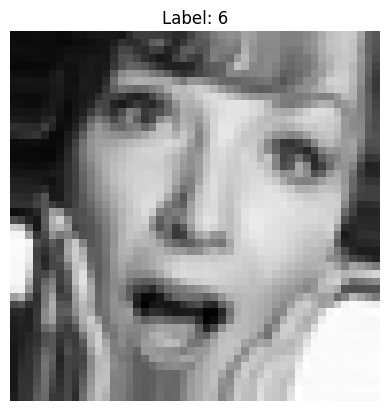

In [10]:
x_batch, y_batch = next(train_data)
plt.imshow(x_batch[0].reshape(48,48),cmap="gray")
plt.title(f"Label: {np.argmax(y_batch[0])}")
plt.axis("off")
plt.show()

In [11]:
base_dir = "FER2013"
music_csv = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\last.fm\Last.fm_data.csv")
print("File exists:", os.path.exists(music_csv))



File exists: True


In [12]:
music_df = pd.read_csv(music_csv)
print("Dataset loaded successfully!")
print("columns available:",music_df.columns)
print(music_df.head())


Dataset loaded successfully!
columns available: Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time'], dtype='object')
   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [13]:

music_df = music_df.drop(columns=['Unnamed: 0', 'username', 'date', 'time'], errors='ignore')

print(music_df.head())


  Username           Artist                          Track  \
0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1  Babs_05  Isobel Campbell                   Dusty Wreath   
2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [14]:
music_df = music_df.drop_duplicates(subset=['Track', 'Artist'])

print("Dataset shape after cleaning:", music_df.shape)


Dataset shape after cleaning: (76038, 6)


In [15]:
music_df['Track'] = music_df['Track'].str.lower().str.strip()
music_df['Artist'] = music_df['Artist'].str.lower().str.strip()


In [16]:
def map_emotion(track, artist):
    track = str(track).lower()
    artist = str(artist).lower()

    
    if "love" in track or "happy" in track or "dance" in track:
        return "happy"
    elif "sad" in track or "cry" in track or "lonely" in track:
        return "sad"
    elif "rock" in track or "metal" in artist or "angry" in track:
        return "angry"
    elif "calm" in track or "chill" in track or "instrumental" in track:
        return "neutral"
    else:
        return "neutral"  # default


music_df['emotion'] = music_df.apply(lambda x: map_emotion(x['Track'], x['Artist']), axis=1)

print(music_df[['Track', 'Artist', 'emotion']].head(10))


                               Track           Artist  emotion
0         the circus is leaving town  isobel campbell  neutral
1                       dusty wreath  isobel campbell  neutral
2         honey child what can i do?  isobel campbell  neutral
3      it's hard to kill a bad thing  isobel campbell  neutral
4                    saturday's gone  isobel campbell  neutral
5  (do you wanna) come walk with me?  isobel campbell  neutral
6                       ramblin' man  isobel campbell  neutral
7                           revolver  isobel campbell  neutral
8          ballad of the broken seas  isobel campbell  neutral
9                  the false husband  isobel campbell  neutral


In [17]:
import random

def recommend_songs(emotion, n=5):
    # Filter dataset on detected emotion
    filtered = music_df[music_df['emotion'] == emotion]

    if filtered.empty:
        return ["No songs found for this emotion."]


    return filtered.sample(n=min(n, len(filtered)))[['Track', 'Artist']]


In [18]:

detected_emotion = "happy"

print(f"🎵 Recommended Songs for Emotion: {detected_emotion}")
print(recommend_songs(detected_emotion, n=5))


🎵 Recommended Songs for Emotion: happy
                                                   Track           Artist
16275                                    lover's resolve      mark system
19255                                  anything but love    steve hackett
17903                                             lovers        rei brown
30732  the rite of spring, pt. 1: the adoration of th...  igor stravinsky
12479                                          real love        big thief


In [19]:
import math
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [20]:
# Cell 2 - Change input_shape if needed (48,48,1 for FER-2013)
def build_cnn(input_shape=(48,48,1), n_classes=7):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example build
cnn = build_cnn()
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,935 (2.61 MB)

 Trainable params: 684,231 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [21]:

print("Using generator path" if 'train_data' in globals() else "No train_data detected")
if 'train_data' in globals():
    train_classes = train_data.classes  # array of integer labels
    classes_unique = np.unique(train_classes)
    cw = compute_class_weight('balanced', classes=classes_unique, y=train_classes)
    class_weights = dict(zip(classes_unique, cw))
    print("Class weights:", class_weights)
else:
    class_weight = None


Using generator path
Class weights: {np.int32(0): np.float64(1.0266404434114071), np.int32(1): np.float64(9.401555464592715), np.int32(2): np.float64(1.0009587727708533), np.int32(3): np.float64(0.5684585684585685), np.int32(4): np.float64(0.826068191627104), np.int32(5): np.float64(0.8491570541259982), np.int32(6): np.float64(1.2933160650937552)}


In [22]:

es = callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mc_path = "fer_cnn_best.keras"
mc = callbacks.ModelCheckpoint(mc_path, monitor='val_loss', save_best_only=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

EPOCHS = 40
BATCH_SIZE = 64

In [23]:
if 'train_data' in globals():
    model = build_cnn(input_shape=(48,48,1), n_classes=train_data.num_classes)

    steps_per_epoch = math.ceil(train_data.n / train_data.batch_size)
    validation_steps = math.ceil(val_data.n / val_data.batch_size)


In [24]:
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=[es, mc ,rlr],
    verbose=1
)

C:\Users\avija\Downloads\FER2013\tfvenv2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 247ms/step - accuracy: 0.1844 - loss: 2.3293 - val_accuracy: 0.1089 - val_loss: 3.0062 - learning_rate: 0.0010
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.2482 - loss: 1.9222 - val_accuracy: 0.2698 - val_loss: 1.8514 - learning_rate: 0.0010
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.2918 - loss: 1.7595 - val_accuracy: 0.2634 - val_loss: 1.9650 - learning_rate: 0.0010
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.3237 - loss: 1.7133 - val_accuracy: 0.3928 - val_loss: 1.6061 - learning_rate: 0.0010
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 124ms/step - accuracy: 0.3470 - loss: 1.6564 - val_accuracy: 0.3771 - val_loss: 1.6316 - learning_rate: 0.0010
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.3675 - loss: 1.6155 - val_accuracy: 0.3796 - val_loss: 1.6005 - learning_rate: 0.0010
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.3

In [25]:

if os.path.exists(mc_path):
    model.load_weights(mc_path)

# Evaluate
if 'X_test' in globals():
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test loss: {loss:.4f}, Test acc: {acc:.4f}")
elif 'test_data' in globals():
    test_steps = math.ceil(test_data.n / test_data.batch_size)
    loss, acc = model.evaluate(test_data, steps=test_steps, verbose=1)
    print(f"Test loss: {loss:.4f}, Test acc: {acc:.4f}")




113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5588 - loss: 1.1559
Test loss: 1.1559, Test acc: 0.5588


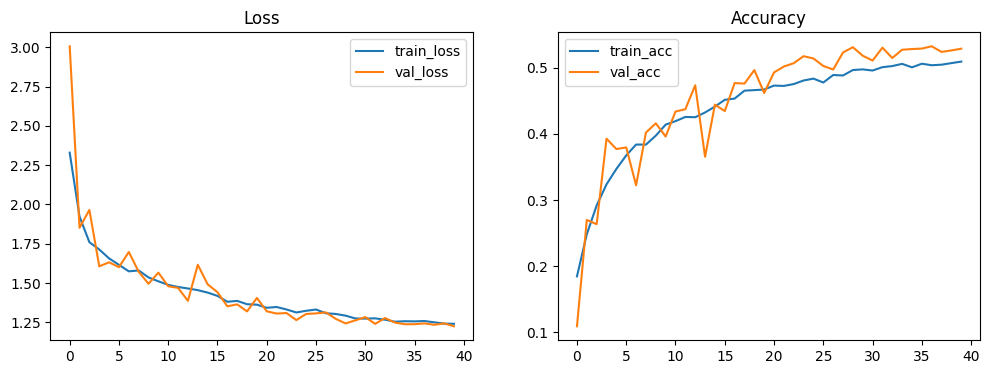

In [26]:
if 'history' in globals():
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],label='train_loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend();plt.title("Loss")
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],label='train_acc')
    plt.plot(history.history['val_accuracy'],label='val_acc')
    plt.legend();plt.title("Accuracy")
    plt.show()

In [27]:

emotion_map = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'sad',5:'surprise',6:'neutral'}

predictions = []
if 'test_data' in globals():
    
    test_steps = math.ceil(test_data.n / test_data.batch_size)
    probs = model.predict(test_data, steps=test_steps, verbose=1)
    preds = np.argmax(probs, axis=1)
    filenames = test_data.filenames  # relative paths from test_dir
    
    for fname, p, prob in zip(filenames, preds, probs):
        predictions.append({
            'filename': fname,
            'predicted_label': int(p),
            'predicted_emotion': emotion_map[int(p)],
            'probabilities': prob.tolist()
        })

elif 'X_test' in globals():
    probs = model.predict(X_test, verbose=1)
    preds = np.argmax(probs, axis=1)
    for i, (p, prob) in enumerate(zip(preds, probs)):
        predictions.append({
            'index': i,
            'predicted_label': int(p),
            'predicted_emotion': emotion_map[int(p)],
            'probabilities': prob.tolist()
        })


pred_df = pd.DataFrame(predictions)
pred_df.to_csv("fer_test_predictions.csv", index=False)
print("Saved predictions to fer_test_predictions.csv")


model.save("fer_cnn_full_model.keras")
print("Saved model to fer_cnn_full_model.keras")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Saved predictions to fer_test_predictions.csv
Saved model to fer_cnn_full_model.keras


In [28]:

preds = pd.read_csv("fer_test_predictions.csv")
sample = preds.iloc[0]
emotion = sample['predicted_emotion']


print(recommend_songs(emotion, n=5))

                                               Track                 Artist
17937        for those about to rock (we salute you)                  ac/dc
59978                              conductor (redux)           metal church
34780                                      dyers eve              metallica
14804                            block rockin' beats  the chemical brothers
46871  cross me (feat. chance the rapper & pnb rock)             ed sheeran


In [46]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

cleaned_music_df = music_df.copy()  

cleaned_music_df['combined'] = (
    cleaned_music_df['Track'].astype(str) + " " +
    cleaned_music_df['Artist'].astype(str) + " " +
    cleaned_music_df['emotion'].astype(str)
)


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(cleaned_music_df['combined'])

def recommend_songs_by_emotion(emotion, n=5):
    emotion = emotion.lower().strip()
    subset = cleaned_music_df[cleaned_music_df['emotion'] == emotion]
    if subset.empty:
        return ["No songs found for this emotion."]
    random_index = subset.sample(1).index[0]
    cosine_sim = cosine_similarity(tfidf_matrix[random_index], tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[-n-1:-1][::-1]
    return cleaned_music_df.iloc[similar_indices][['Track', 'Artist', 'emotion']]

preds = pd.read_csv("fer_test_predictions.csv")   
sample = preds.iloc[0]                            
detected_emotion = sample['predicted_emotion']

print(f"🎧 Recommended Songs for Detected Emotion: {detected_emotion.upper()}\n")
print(recommend_songs_by_emotion(detected_emotion, n=5))


🎧 Recommended Songs for Detected Emotion: ANGRY

                 Track      Artist  emotion
94             wotless  crafty 893  neutral
123920       chin chin   noga erez  neutral
22      brace yourself     lnzndrf  neutral
52203      cheerleader         omi  neutral
21547       ether flac       naoki  neutral
